In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

# Import File

In [3]:
#Importing file
shark_attacks = pd.read_csv(r'C:\Patricia\Backup\Tecnologia\Ironhack\Shark_attacks\attacks.csv', encoding='latin1')

#Modify display options
pd.options.display.max_columns = 99

#View information
shark_attacks.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [138]:
shark_attacks.shape

(25723, 24)

# Heatmap before dropping duplicate values

<AxesSubplot:>

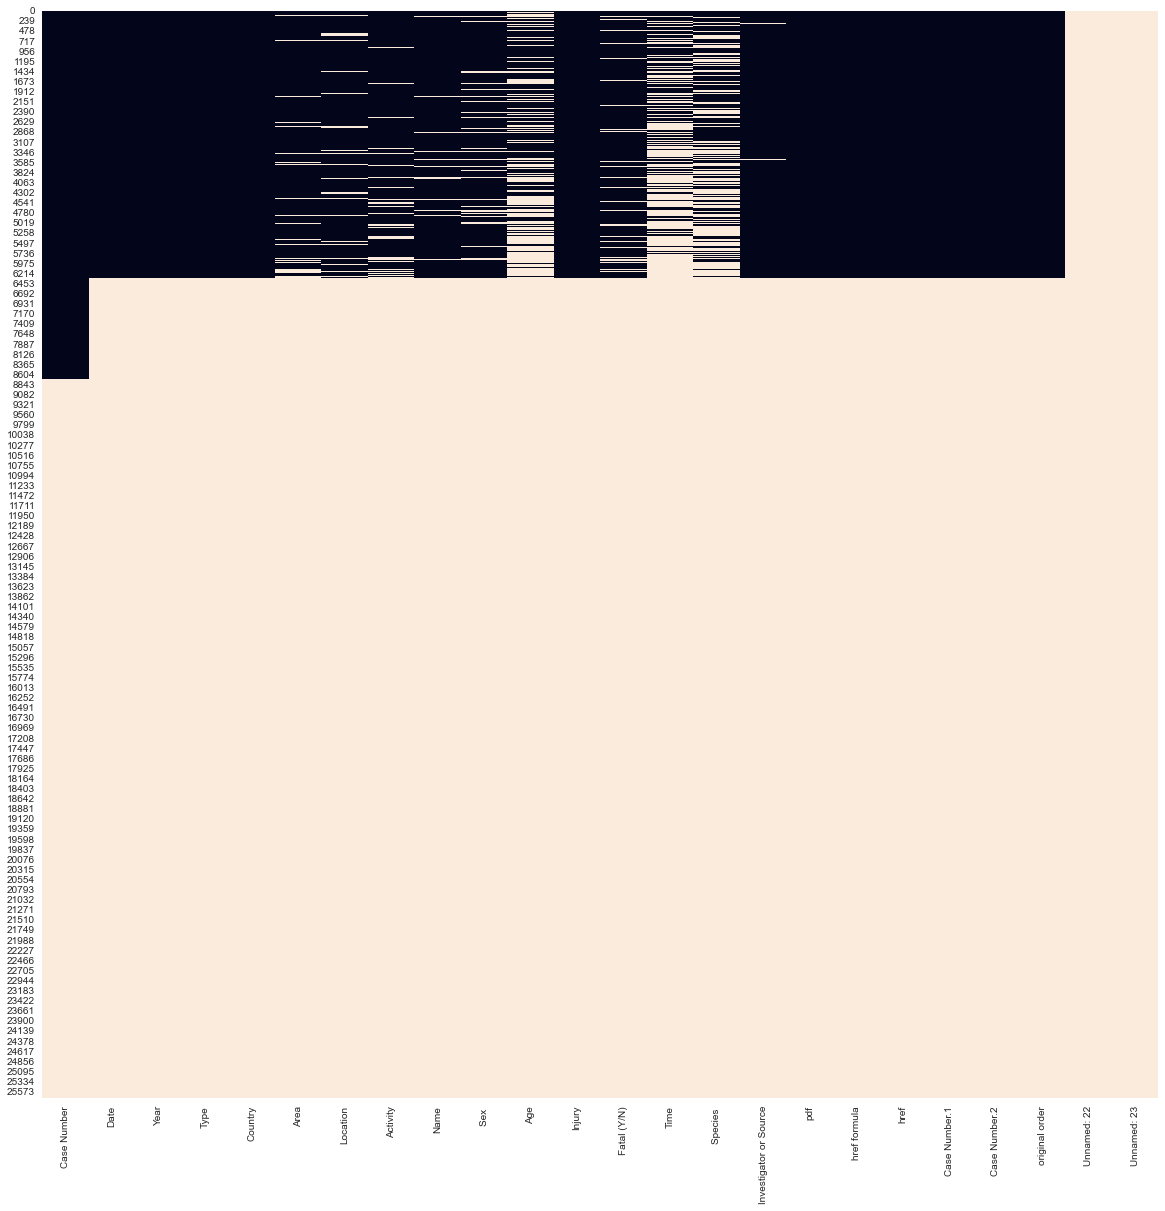

In [4]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(shark_attacks.isnull(),cbar=False)

In [4]:
#Show columns names
shark_attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
# Rename Species ' column to 'Species' and 'Sex ' to 'Sex'
shark_attacks = shark_attacks.rename(columns = {'Species ':'Species'})
shark_attacks = shark_attacks.rename(columns = {'Sex ':'Sex'})

shark_attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
# Numbers of lines and columns
shark_attacks.shape

(25723, 24)

In [5]:
#Check the number of duplicated rows
shark_attacks.duplicated().sum()

19411

In [9]:
#Show duplicated rows
shark_attacks[shark_attacks.duplicated(keep = False)].sort_values(by = ['Case Number', 'Date'])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop duplicated rows and reset index
shark_attacks = shark_attacks.drop_duplicates(keep='last', ignore_index=True)
shark_attacks = shark_attacks.reset_index()

In [8]:
# Drop lines if has less than 5 columns filled
shark_attacks =shark_attacks.dropna(thresh=5)
shark_attacks

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [9]:
# Drop empty columns
shark_attacks = shark_attacks.drop(columns=['Unnamed: 22','Unnamed: 23'])

In [9]:
shark_attacks

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [10]:
shark_attacks.shape

(6302, 23)

# Heatmap after dropping duplicate values

<AxesSubplot:>

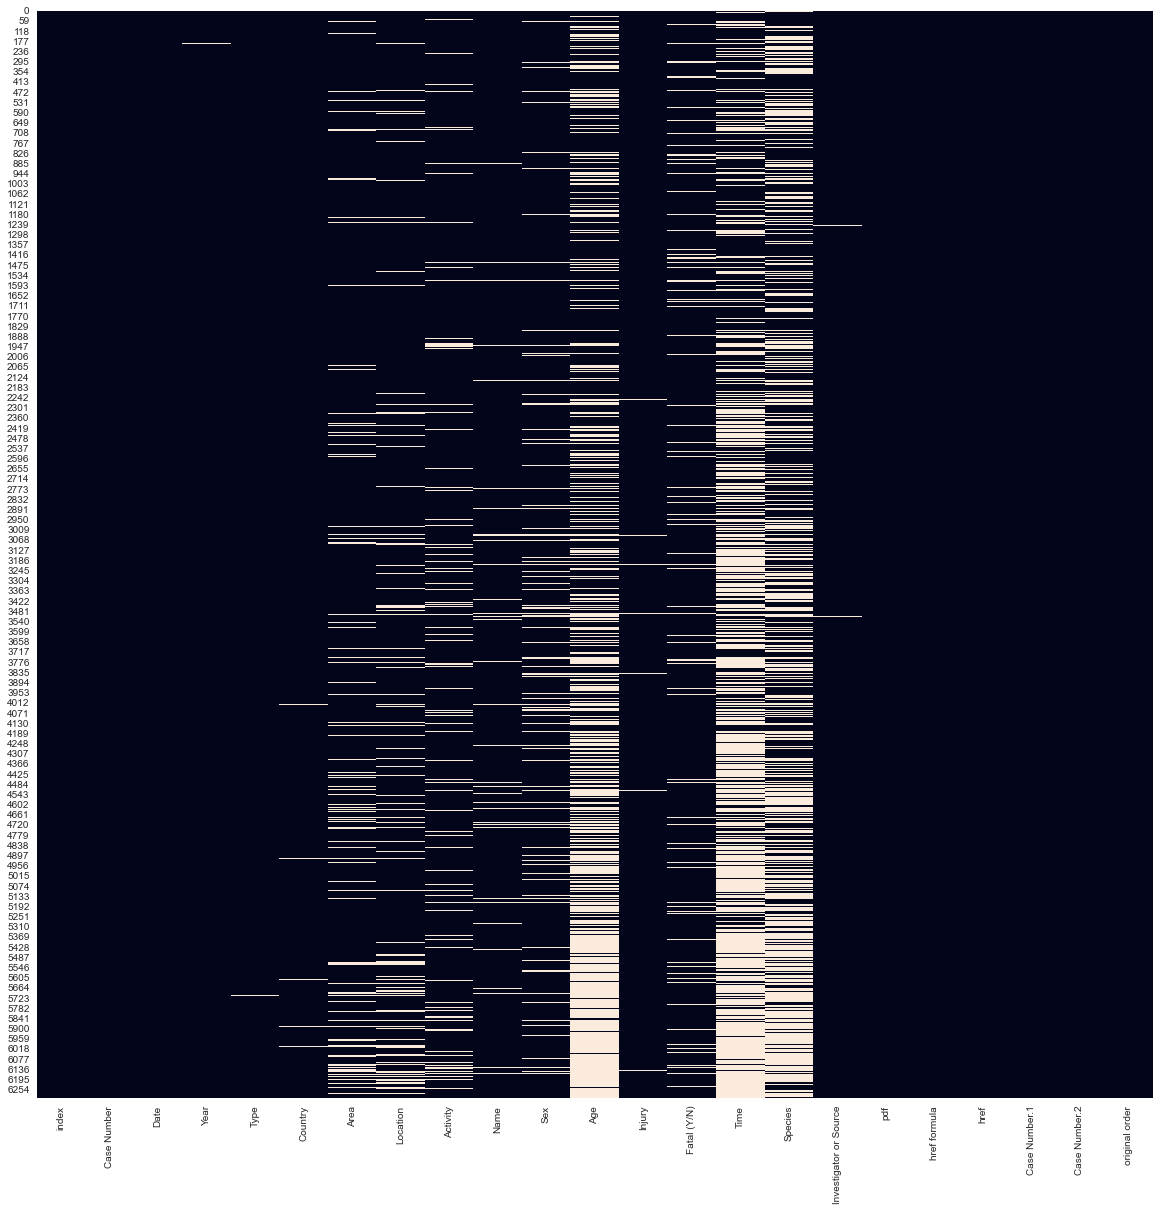

In [15]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(shark_attacks.isnull(),cbar=False)

In [16]:
shark_attacks.dtypes

index                       int64
Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
dtype: object

In [11]:
# Pandas Profiling Report
from pandas_profiling import ProfileReport

In [12]:
profile = ProfileReport(shark_attacks)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ******ARE THERE MORE FATAL ATTACKS ? *******

# ***** NO

In [13]:
# What values are in the column 'Fatal (Y/N)'?
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,7,5,6,7,6,7,3,5,7,7,7,7,7,7,7
2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
N,4293,4292,4293,4293,4292,4274,4087,4018,4018,4227,3945,2606,4293,2293,2497,4282,4293,4293,4293,4293,4293,4293
N,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [14]:
#Identify line with '2017' value at column 'Fatal (Y/N)'
mask_fatal_2017 = shark_attacks['Fatal (Y/N)'] == '2017'
shark_attacks[mask_fatal_2017]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
786,786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0


In [15]:
# Just a injured leg, probably not fatal. 
shark_attacks.loc[mask_fatal_2017,'Fatal (Y/N)'] = 'N'
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,7,5,6,7,6,7,3,5,7,7,7,7,7,7,7
M,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
N,4294,4293,4294,4294,4293,4275,4088,4019,4019,4228,3946,2607,4294,2294,2498,4283,4294,4294,4294,4294,4294,4294
N,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [16]:
#Identify line with 'M' value at column 'Fatal (Y/N)'
mask_fatal_m = shark_attacks['Fatal (Y/N)'] == 'M'
shark_attacks[mask_fatal_m]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
285,285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0


In [17]:
# Letter "M" is next letter "N" at the keyboard. It looks like a type error.
shark_attacks.loc[mask_fatal_m,'Fatal (Y/N)'] = 'N'
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,7,5,6,7,6,7,3,5,7,7,7,7,7,7,7
N,4295,4294,4295,4295,4294,4276,4089,4020,4020,4229,3947,2608,4295,2295,2499,4284,4295,4295,4295,4295,4295,4295
N,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [18]:
#Remove whitespace before and after the string
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].str.strip()

shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,4303,4302,4303,4303,4302,4284,4097,4028,4025,4236,3954,2614,4303,2298,2504,4292,4303,4303,4303,4303,4303,4303
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [19]:
#Identify line with 'y' value at column 'Fatal (Y/N)'
mask_fatal_y = shark_attacks['Fatal (Y/N)'] == 'y'
shark_attacks[mask_fatal_y]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6117,6117,1815.10.00,October 1815,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,males x 4,M,NaN,FATAL,y,NaN,NaN,"C.Moore, GSAF",1815.10.00-Tobago.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1815.10.00,1815.10.00,186.0


In [20]:
#Turn lower to uppercase letter
shark_attacks.loc[mask_fatal_y,'Fatal (Y/N)'] = 'Y'
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,4303,4302,4303,4303,4302,4284,4097,4028,4025,4236,3954,2614,4303,2298,2504,4292,4303,4303,4303,4303,4303,4303
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1389,1389,1389,1388,1387,1365,1198,1192,1283,1311,1282,620,1388,497,427,1389,1389,1388,1389,1389,1389,1389


In [21]:
shark_attacks['Fatal (Y/N)'].isnull().value_counts()

False    5763
True      539
Name: Fatal (Y/N), dtype: int64

In [22]:
shark_attacks['Fatal (Y/N)'].isnull().value_counts(normalize=True)

False    0.914472
True     0.085528
Name: Fatal (Y/N), dtype: float64

In [130]:
# For this analise, the column 'Fatal (Y/N)' = UNKNOWN was ignored
shark_fatal_attacks = 0
shark_no_fatal_attacks = 0
total_attacks = 0
shark_unknown_attacks = 0
total_attacks_with_unknown = 0

mask_no_fatal_attacks = shark_attacks['Fatal (Y/N)'] == 'N'
shark_no_fatal_attacks = len(shark_attacks[mask_no_fatal_attacks])

mask_fatal_attacks = shark_attacks['Fatal (Y/N)'] == 'Y'
shark_fatal_attacks = len(shark_attacks[mask_fatal_attacks])

mask_shark_unknown_attacks = shark_attacks['Fatal (Y/N)'] == 'UNKNOWN'
shark_unknown_attacks = len(shark_attacks[mask_shark_unknown_attacks])

total_attacks_with_unknown = shark_fatal_attacks + shark_no_fatal_attacks + shark_unknown_attacks

total_attacks = shark_fatal_attacks + shark_no_fatal_attacks

print('Total Shark Attacks with Known Results:', total_attacks,'attacks')
print('Fatal Shark Attacks:', shark_fatal_attacks, 'attacks /', round(((shark_fatal_attacks/total_attacks)*100),2), '%')
print('Non Fatal Shark Attacks:', shark_no_fatal_attacks, 'attacks /', round(((shark_no_fatal_attacks/total_attacks)*100),2), '%')

print('*** Attacks with Unknown Results:', shark_unknown_attacks, 'attacks /', 
      round(((shark_unknown_attacks/total_attacks_with_unknown)*100),2), '% (not inside the previous analise)')


Total Shark Attacks with Known Results: 5692 attacks
Fatal Shark Attacks: 1389 attacks / 24.4 %
Non Fatal Shark Attacks: 4303 attacks / 75.6 %
*** Attacks with Unknown Results: 71 attacks / 1.23 % (not inside the previous analise)


#  ******ARE THERE MORE ATTACKS FOR MALE OR FEMALE? *******

# ***** MALE

In [24]:
#Identify values inside 'Sex' column
shark_attacks.groupby('Sex').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Sex,,,,,,,,,,,,,,,,,,,,,,
.,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637
M,5094,5093,5094,5092,5090,5052,4723,4651,4754,5036,2968,5080,4691,2456,2770,5082,5094,5093,5094,5094,5094,5094
M,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,2,2,2,2,2,2
N,2,2,2,2,2,1,1,1,2,2,0,2,2,0,2,2,2,2,2,2,2,2
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
#Identify 'Sex' = '.''
mask_sex_dot = shark_attacks['Sex'] == '.'
shark_attacks[mask_sex_dot]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5437,5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866.0


In [26]:
#It is impossible identify. Turn X inside 'sex'
shark_attacks.loc[mask_sex_dot,'Sex'] = 'X'
shark_attacks.groupby('Sex').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Sex,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637
M,5094,5093,5094,5092,5090,5052,4723,4651,4754,5036,2968,5080,4691,2456,2770,5082,5094,5093,5094,5094,5094,5094
M,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,2,2,2,2,2,2
N,2,2,2,2,2,1,1,1,2,2,0,2,2,0,2,2,2,2,2,2,2,2
X,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [27]:
#Remove whitespace before and after the string
shark_attacks['Sex'] = shark_attacks['Sex'].str.strip()

shark_attacks.groupby('Sex').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Sex,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637
M,5096,5095,5096,5094,5092,5054,4725,4653,4756,5038,2969,5082,4693,2457,2771,5084,5096,5095,5096,5096,5096,5096
N,2,2,2,2,2,1,1,1,2,2,0,2,2,0,2,2,2,2,2,2,2,2
X,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [28]:
#Identify line 'Sex' = 'N'
mask_sex_n = shark_attacks['Sex'] == 'N'
shark_attacks[mask_sex_n]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4938,4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0
6131,6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172.0


In [29]:
#Identify line 'Sex' = 'N' where 'Name' is 'Stephen Pettigew'
shark_attacks['Name'] = shark_attacks['Name'].str.strip()
mask_sex_stephen = shark_attacks['Name'] == 'Stephen Pettigew'
shark_attacks[mask_sex_stephen]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6131,6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172.0


In [30]:
#Change line where 'Name' is 'Stephen Pettigew' to 'Sex' = 'M' 
shark_attacks.loc[mask_sex_stephen,'Sex'] = 'M'
shark_attacks.groupby('Sex').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Sex,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637
M,5097,5096,5097,5095,5093,5054,4725,4653,4757,5039,2969,5083,4694,2457,2772,5085,5097,5096,5097,5097,5097,5097
N,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1
X,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [31]:
#Identify line 'Sex' = 'N'
mask_sex_n = shark_attacks['Sex'] == 'N'
shark_attacks[mask_sex_n]


,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4938,4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0


In [32]:
#There were male and female in this case.
#It is impossible identify. Turn X inside 'sex'
shark_attacks.loc[mask_sex_n,'Sex'] = 'X'
shark_attacks.groupby('Sex').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Sex,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637
M,5097,5096,5097,5095,5093,5054,4725,4653,4757,5039,2969,5083,4694,2457,2772,5085,5097,5096,5097,5097,5097,5097
X,2,2,2,2,2,2,2,2,2,1,0,2,2,0,2,2,2,2,2,2,2,2
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
#Identify line 'Sex' = 'lli'
mask_sex_lli = shark_attacks['Sex'] == 'lli'
shark_attacks[mask_sex_lli]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
1624,1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0


In [34]:
#Update line 'Sex' = 'lli' to 'M'. The name is 'Brian'
shark_attacks.loc[mask_sex_lli,'Sex'] = 'M'
shark_attacks.groupby('Sex').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Sex,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637
M,5098,5097,5098,5096,5094,5055,4726,4654,4758,5040,2970,5084,4695,2458,2773,5086,5098,5097,5098,5098,5098,5098
X,2,2,2,2,2,2,2,2,2,1,0,2,2,0,2,2,2,2,2,2,2,2


In [35]:
# For this analise, the column 'sex' = 'X' is ignored
shark_attacks_male = 0
shark_attacks_female = 0
total_attacks_sex = 0

mask_shark_attacks_male = shark_attacks['Sex'] == 'M'
shark_attacks_male = len(shark_attacks[mask_shark_attacks_male])

mask_shark_attacks_female = shark_attacks['Sex'] == 'F'
shark_attacks_female = len(shark_attacks[mask_shark_attacks_female])

total_attacks_sex = shark_attacks_male + shark_attacks_female

print('Total Shark Attacks with Known Gender:', total_attacks_sex)
print('Male Shark Attacks:', shark_attacks_male, 'attacks /', round(((shark_attacks_male/total_attacks_sex)*100),2), '%')
print('Female Shark Attacks:', shark_attacks_female, 'attacks /', round(((shark_attacks_female/total_attacks_sex)*100),2), '%')

Total Shark Attacks with Known Gender: 5735
Male Shark Attacks: 5098 attacks / 88.89 %
Female Shark Attacks: 637 attacks / 11.11 %


In [36]:
#Update new columns with valid values
shark_attacks.loc[shark_attacks['Sex']=='F','sex_valid'] = 'F'
shark_attacks.loc[shark_attacks['Sex']=='M','sex_valid'] = 'M'

shark_attacks.loc[shark_attacks['Fatal (Y/N)']=='Y','fatal_valid'] = 'Y'
shark_attacks.loc[shark_attacks['Fatal (Y/N)']=='N','fatal_valid'] = 'N'

In [37]:
shark_attacks.groupby('sex_valid').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,fatal_valid
sex_valid,,,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,637,463,637,579,385,370,634,637,637,637,637,637,637,575
M,5098,5097,5098,5096,5094,5055,4726,4654,4758,5040,5098,2970,5084,4695,2458,2773,5086,5098,5097,5098,5098,5098,5098,4659


In [38]:
shark_attacks.groupby('fatal_valid').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,sex_valid
fatal_valid,,,,,,,,,,,,,,,,,,,,,,,,
N,4303,4302,4303,4303,4302,4284,4097,4028,4025,4236,3954,2614,4303,4303,2298,2504,4292,4303,4303,4303,4303,4303,4303,3953
Y,1389,1389,1389,1388,1387,1365,1198,1192,1283,1311,1282,620,1388,1389,497,427,1389,1389,1388,1389,1389,1389,1389,1281


# Shark attacks by known result and gender

In [39]:
# Shows
shark_attacks.groupby(['fatal_valid','sex_valid']).count()

df_index  Case Number  Date  Year  Type  Country  Area  \
fatal_valid sex_valid                                                           
N           F               468          468   468   468   468      465   457   
            M              3485         3484  3485  3485  3484     3470  3315   
Y           F               107          107   107   107   107      107   100   
            M              1174         1174  1174  1173  1172     1152  1015   

                       Location  Activity  Name   Sex   Age  Injury  \
fatal_valid sex_valid                                                 
N           F               451       440   466   468   356     468   
            M              3254      3309  3464  3485  2233    3485   
Y           F                99        97   105   107    69     107   
            M              1009      1098  1147  1174   543    1173   

                       Fatal (Y/N)  Time  Species  Investigator or Source  \
fatal_valid sex_valid                                                       
N           F                  468   320      261                     466   
            M                 3485  1903     2026                    3477   
Y           F                  107    46       53                     107   
            M                 1174   435      351                    1174   

                        pdf  href formula  href  Case Number.1  Case Number.2  \
fatal_valid sex_valid                                                           
N           F           468           468   468            468            468   
            M          3485          3485  3485           3485           3485   
Y           F           107           107   107            107            107   
            M          1174          1173  1174           1174           1174   

                       original order  
fatal_valid sex_valid                  
N           F                     468  
            M                    3485  
Y           F                     107  
            M                    1174

# Shark attacks by gender and known result

In [40]:
shark_attacks.groupby(['sex_valid','fatal_valid']).count()

df_index  Case Number  Date  Year  Type  Country  Area  \
sex_valid fatal_valid                                                           
F         N                 468          468   468   468   468      465   457   
          Y                 107          107   107   107   107      107   100   
M         N                3485         3484  3485  3485  3484     3470  3315   
          Y                1174         1174  1174  1173  1172     1152  1015   

                       Location  Activity  Name   Sex   Age  Injury  \
sex_valid fatal_valid                                                 
F         N                 451       440   466   468   356     468   
          Y                  99        97   105   107    69     107   
M         N                3254      3309  3464  3485  2233    3485   
          Y                1009      1098  1147  1174   543    1173   

                       Fatal (Y/N)  Time  Species  Investigator or Source  \
sex_valid fatal_valid                                                       
F         N                    468   320      261                     466   
          Y                    107    46       53                     107   
M         N                   3485  1903     2026                    3477   
          Y                   1174   435      351                    1174   

                        pdf  href formula  href  Case Number.1  Case Number.2  \
sex_valid fatal_valid                                                           
F         N             468           468   468            468            468   
          Y             107           107   107            107            107   
M         N            3485          3485  3485           3485           3485   
          Y            1174          1173  1174           1174           1174   

                       original order  
sex_valid fatal_valid                  
F         N                       468  
          Y                       107  
M         N                      3485  
          Y                      1174

# *****Are shark attacks influenced by hemisphere?

https://www.kaggle.com/datasets/max-mind/world-cities-database

In [41]:
#Importing file country/latitude/longitude
countries = pd.read_csv(r'C:\Patricia\Backup\Tecnologia\Ironhack\countries.csv')

countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [42]:
#Remove whitespace before and after the string. Rewrite name values using capital letters 
countries['name'] = countries['name'].str.strip()
countries['name'] = countries['name'].str.upper()
countries = countries.rename(columns = {'name':'Country'})
countries.head()

,country,latitude,longitude,Country
0,AD,42.546245,1.601554,ANDORRA
1,AE,23.424076,53.847818,UNITED ARAB EMIRATES
2,AF,33.939110,67.709953,AFGHANISTAN
3,AG,17.060816,-61.796428,ANTIGUA AND BARBUDA
4,AI,18.220554,-63.068615,ANGUILLA


In [43]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('?','')
shark_attacks['Country'] = shark_attacks['Country'].str.strip()
shark_attacks['Country'] = shark_attacks['Country'].str.upper()

#shark_attacks.groupby(['Country','Area']).count()
shark_attacks.groupby('Country').count()

C:\Users\patri\AppData\Local\Temp/ipykernel_17104/759401840.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shark_attacks['Country'] = shark_attacks['Country'].str.replace('?','')


,df_index,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,sex_valid,fatal_valid
Country,,,,,,,,,,,,,,,,,,,,,,,,
ADMIRALTY ISLANDS,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
AFRICA,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1
ALGERIA,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1
AMERICAN SAMOA,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3
ANDAMAN / NICOBAR ISLANDAS,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VENEZUELA,11,11,11,11,11,7,6,9,11,11,4,11,11,4,4,11,11,11,11,11,11,11,11,11
VIETNAM,15,15,15,15,14,10,12,12,14,15,6,15,15,6,4,15,15,15,15,15,15,15,15,15
WEST INDIES,2,2,2,2,2,0,0,2,2,2,0,2,2,0,0,2,2,2,2,2,2,2,2,2


In [44]:
#Identify null values at Country
shark_attacks['Country'].isnull().value_counts()

False    6252
True       50
Name: Country, dtype: int64

In [45]:
mask_shark_country_isnull = shark_attacks['Country'].isnull()
shark_attacks[mask_shark_country_isnull]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,sex_valid,fatal_valid
62,62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,M,N
525,525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0,M,NaN
2956,2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,M,N
3378,3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,M,N
3387,3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,NaN,NaN
3388,3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0,M,N
3395,3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0,M,N
3399,3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0,F,N
3425,3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0,M,N
3605,3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0,M,N


In [46]:
shark_country_unique = shark_attacks['Country'].unique()
shark_country_unique

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB E

In [47]:
len(shark_country_unique)

199

In [25]:
shark_country_unique = []
shark_country_unique = shark_attacks['Country'].unique()
shark_country_unique

array(['UNITED STATES', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'UNITED KINGDOM',
       'SOUTH AFRICA', 'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS',
       'NEW CALEDONIA', 'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'FIJI', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'PAPUA PAPUA NEW GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA',
       'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA AND BARBUDA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS

# I used 'unique' to discover the values into the main database and compared with the database of coordinates

In [48]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')
mask_shark_uae = shark_attacks['Country']=='UNITED ARAB EMIRATES (UAE)'
shark_attacks[mask_shark_uae]
shark_attacks.loc[mask_shark_uae,'Country'] = 'UNITED ARAB EMIRATES'

In [49]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('USA','UNITED STATES',regex=True)
mask_shark_usa = shark_attacks['Country']=='USA'
shark_attacks[mask_shark_usa]
shark_attacks.loc[mask_shark_usa,'Country'] = 'UNITED STATES'

In [26]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ENGLAND','UNITED KINGDOM',regex=True)
mask_shark_england = shark_attacks['Country']=='ENGLAND'
shark_attacks[mask_shark_england]
shark_attacks.loc[mask_shark_england,'Country'] = 'UNITED KINGDOM'

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order


In [50]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ANTIGUA','ANTIGUA AND BARBUDA',regex=True)
mask_shark_antigua = shark_attacks['Country']=='ANTIGUA'
shark_attacks[mask_shark_antigua]
shark_attacks.loc[mask_shark_antigua,'Country'] = 'ANTIGUA AND BARBUDA'

In [51]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NEW GUINEA','PAPUA NEW GUINEA',regex=True)
mask_shark_ng = shark_attacks['Country']=='NEW GUINEA'
shark_attacks[mask_shark_ng]
shark_attacks.loc[mask_shark_ng,'Country'] = 'PAPUA NEW GUINEA'

In [52]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('OKINAWA','JAPAN',regex=True) 
mask_shark_jp = shark_attacks['Country']=='OKINAWA'
shark_attacks[mask_shark_jp]
shark_attacks.loc[mask_shark_jp,'Country'] = 'JAPAN'

In [53]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BRITISH NEW GUINEA','PAPUA NEW GUINEA',regex=True)
mask_shark_bgn = shark_attacks['Country']=='BRITISH NEW GUINEA'
shark_attacks[mask_shark_bgn]
shark_attacks.loc[mask_shark_bgn,'Country'] = 'PAPUA NEW GUINEA'

In [54]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('FEDERATED STATES OF MICRONESIA','MICRONESIA',regex=True)
mask_shark_fsm = shark_attacks['Country']=='FEDERATED STATES OF MICRONESIA'
shark_attacks[mask_shark_fsm]
shark_attacks.loc[mask_shark_fsm,'Country'] = 'MICRONESIA'

In [55]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('MALDIVE ISLANDS','MALDIVES',regex=True)
mask_shark_maldives = shark_attacks['Country']=='MALDIVE ISLANDS'
shark_attacks[mask_shark_maldives]
shark_attacks.loc[mask_shark_maldives,'Country'] = 'MALDIVES'

In [56]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SAN DOMINGO','DOMINICAN REPUBLIC',regex=True)
mask_shark_sd = shark_attacks['Country']=='SAN DOMINGO'
shark_attacks[mask_shark_sd]
shark_attacks.loc[mask_shark_sd,'Country'] = 'DOMINICAN REPUBLIC'

In [57]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('CRETE','GREECE',regex=True)
mask_shark_crete = shark_attacks['Country']=='CRETE'
shark_attacks[mask_shark_crete]
shark_attacks.loc[mask_shark_crete,'Country'] = 'GREECE'

In [58]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BURMA','MYANMAR',regex=True)
mask_shark_b = shark_attacks['Country']=='BURMA'
shark_attacks[mask_shark_b]
shark_attacks.loc[mask_shark_b,'Country'] = 'MYANMAR'

In [59]:
#countries['Country'] = countries['Country'].str.replace('MYANMAR [BURMA]','MYANMAR',regex=True)
mask_shark_mb = shark_attacks['Country']=='MYANMAR [BURMA]'
shark_attacks[mask_shark_mb]
shark_attacks.loc[mask_shark_mb,'Country'] = 'MYANMAR'

In [60]:
#countries['Country'] = countries['Country'].str.replace('FALKLAND ISLANDS [ISLAS MALVINAS]','FALKLAND ISLANDS',regex=True)
mask_countries_fi = countries['Country']=='FALKLAND ISLANDS [ISLAS MALVINAS]'
countries[mask_countries_fi]
countries.loc[mask_countries_fi,'Country'] = 'FALKLAND ISLANDS'

In [61]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('CEYLON (SRI LANKA)','SRI LANKA',regex=True)
mask_shark_c = shark_attacks['Country']=='CEYLON (SRI LANKA)'
shark_attacks[mask_shark_c]
shark_attacks.loc[mask_shark_c,'Country'] = 'SRI LANKA'

In [62]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('CEYLON','SRI LANKA',regex=True)
mask_shark_ce = shark_attacks['Country']=='CEYLON'
shark_attacks[mask_shark_ce]
shark_attacks.loc[mask_shark_ce,'Country'] = 'SRI LANKA'

In [63]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('TRINIDAD & TOBAGO','TRINIDAD AND TOBAGO',regex=True)
mask_shark_tt = shark_attacks['Country']=='TRINIDAD & TOBAGO'
shark_attacks[mask_shark_tt]
shark_attacks.loc[mask_shark_tt,'Country'] = 'TRINIDAD AND TOBAGO'

In [64]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('TOBAGO','TRINIDAD AND TOBAGO',regex=True)
mask_shark_t = shark_attacks['Country']=='TOBAGO'
shark_attacks[mask_shark_t]
shark_attacks.loc[mask_shark_t,'Country'] = 'TRINIDAD AND TOBAGO'

In [65]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BAHREIN','BAHRAIN',regex=True)
mask_shark_b = shark_attacks['Country']=='BAHREIN'
shark_attacks[mask_shark_b]
shark_attacks.loc[mask_shark_b,'Country'] = 'BAHRAIN'

In [66]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('CURACAO','NETHERLANDS ANTILLES',regex=True)
mask_shark_curacao = shark_attacks['Country']=='CURACAO'
shark_attacks[mask_shark_curacao]
shark_attacks.loc[mask_shark_curacao,'Country'] = 'NETHERLANDS ANTILLES'

In [67]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('AFRICA','CENTRAL AFRICAN REPUBLIC',regex=True)
mask_shark_a = shark_attacks['Country']=='AFRICA'
shark_attacks[mask_shark_a]
shark_attacks.loc[mask_shark_a,'Country'] = 'CENTRAL AFRICAN REPUBLIC'

In [68]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ROATAN','HONDURAS',regex=True)
mask_shark_r = shark_attacks['Country']=='ROATAN'
shark_attacks[mask_shark_r]
shark_attacks.loc[mask_shark_r,'Country'] = 'HONDURAS'

In [69]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BAY OF BENGAL','BANGLADESH',regex=True)
mask_shark_bb = shark_attacks['Country']=='BAY OF BENGAL'
shark_attacks[mask_shark_bb]
shark_attacks.loc[mask_shark_bb,'Country'] = 'BANGLADESH'

In [70]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ANDAMAN ISLANDS','INDIA',regex=True)
mask_shark_ai = shark_attacks['Country']=='ANDAMAN ISLANDS'
shark_attacks[mask_shark_ai]
shark_attacks.loc[mask_shark_ai,'Country'] = 'INDIA'

In [71]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('JAVA','INDONESIA',regex=True)
mask_shark_java = shark_attacks['Country']=='JAVA'
shark_attacks[mask_shark_java]
shark_attacks.loc[mask_shark_java,'Country'] = 'INDONESIA'

In [72]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NEVIS','SAINT KITTS AND NEVIS',regex=True)
mask_shark_nv = shark_attacks['Country']=='NEVIS'
shark_attacks[mask_shark_nv]
shark_attacks.loc[mask_shark_nv,'Country'] = 'SAINT KITTS AND NEVIS'

In [73]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('GULF OF ADEN','DJIBOUTI',regex=True)
mask_shark_ga = shark_attacks['Country']=='GULF OF ADEN'
shark_attacks[mask_shark_ga]
shark_attacks.loc[mask_shark_ga,'Country'] = 'DJIBOUTI'

In [74]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('COLUMBIA','COLOMBIA',regex=True)
mask_shark_co = shark_attacks['Country']=='COLUMBIA'
shark_attacks[mask_shark_co]
shark_attacks.loc[mask_shark_co,'Country'] = 'COLOMBIA'

In [75]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SCOTLAND','UNITED KINGDOM',regex=True)
mask_shark_s = shark_attacks['Country']=='SCOTLAND'
shark_attacks[mask_shark_s]
shark_attacks.loc[mask_shark_s,'Country'] = 'UNITED KINGDOM'

In [76]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BRITISH ISLES','UNITED KINGDOM',regex=True)
mask_shark_bi = shark_attacks['Country']=='BRITISH ISLE'
shark_attacks[mask_shark_bi]
shark_attacks.loc[mask_shark_bi,'Country'] = 'UNITED KINGDOM'

In [77]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NORTH SEA','UNITED KINGDOM',regex=True)
mask_shark_ns = shark_attacks['Country']=='NORTH SEA'
shark_attacks[mask_shark_ns]
shark_attacks.loc[mask_shark_ns,'Country'] = 'UNITED KINGDOM'

In [79]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SOUTHWEST PACIFIC OCEAN','NEW ZEALAND',regex=True)
mask_shark_sp = shark_attacks['Country']=='SOUTHWEST PACIFIC OCEAN'
shark_attacks[mask_shark_sp]
shark_attacks.loc[mask_shark_sp,'Country'] = 'NEW ZEALAND'

In [80]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SOUTH PACIFIC OCEAN','NEW ZEALAND',regex=True)
mask_shark_spo = shark_attacks['Country']=='SOUTH PACIFIC OCEAN'
shark_attacks[mask_shark_spo]
shark_attacks.loc[mask_shark_spo,'Country'] = 'NEW ZEALAND'

In [81]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NORTH ATLANTIC OCEAN','CANADA',regex=True)
mask_shark_nao = shark_attacks['Country']=='NORTH ATLANTIC OCEAN'
shark_attacks[mask_shark_nao]
shark_attacks.loc[mask_shark_nao,'Country'] = 'CANADA'

In [82]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NORTH PACIFIC OCEAN','CANADA',regex=True)
mask_shark_npo = shark_attacks['Country']=='NORTH PACIFIC OCEAN'
shark_attacks[mask_shark_npo]
shark_attacks.loc[mask_shark_npo,'Country'] = 'CANADA'

In [83]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ST. MARTIN','DOMINICAN REPUBLIC',regex=True)
mask_shark_st = shark_attacks['Country']=='ST. MARTIN'
shark_attacks[mask_shark_st]
shark_attacks.loc[mask_shark_st,'Country'] = 'DOMINICAN REPUBLIC'

In [85]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ST. MAARTIN','DOMINICAN REPUBLIC',regex=True)
mask_shark_stt = shark_attacks['Country']=='ST. MAARTIN'
shark_attacks[mask_shark_stt]
shark_attacks.loc[mask_shark_stt,'Country'] = 'DOMINICAN REPUBLIC'

In [86]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('CARIBBEAN SEA','DOMINICAN REPUBLIC',regex=True)
mask_shark_csea = shark_attacks['Country']=='CARIBBEAN SEA'
shark_attacks[mask_shark_csea]
shark_attacks.loc[mask_shark_csea,'Country'] = 'DOMINICAN REPUBLIC'

In [87]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('GRAND CAYMAN','CAYMAN ISLANDS',regex=True)
mask_shark_gc = shark_attacks['Country']=='GRAND CAYMAN'
shark_attacks[mask_shark_gc]
shark_attacks.loc[mask_shark_gc,'Country'] = 'CAYMAN ISLANDS'

In [88]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ITALY / CROATIA','ITALY',regex=True)
mask_shark_ic = shark_attacks['Country']=='ITALY / CROATIA'
shark_attacks[mask_shark_ic]
shark_attacks.loc[mask_shark_ic,'Country'] = 'ITALY'

In [89]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('EQUATORIAL GUINEA / CAMEROON','CAMEROON',regex=True)
mask_shark_eg = shark_attacks['Country']=='EQUATORIAL GUINEA / CAMEROON'
shark_attacks[mask_shark_eg]
shark_attacks.loc[mask_shark_eg,'Country'] = 'CAMEROON'

In [90]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BETWEEN PORTUGAL & INDIA','PORTUGAL',regex=True)
mask_shark_pi = shark_attacks['Country']=='BETWEEN PORTUGAL & INDIA'
shark_attacks[mask_shark_pi]
shark_attacks.loc[mask_shark_pi,'Country'] = 'PORTUGAL'

In [91]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('IRAN / IRAQ','IRAN',regex=True)
mask_shark_iq = shark_attacks['Country']=='IRAN / IRAQ'
shark_attacks[mask_shark_iq]
shark_attacks.loc[mask_shark_iq,'Country'] = 'IRAN'

In [92]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('KOREA','NORTH KOREA',regex=True)
mask_shark_k = shark_attacks['Country']=='KOREA'
shark_attacks[mask_shark_k]
shark_attacks.loc[mask_shark_k,'Country'] = 'NORTH KOREA'

In [93]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('TASMAN SEA','AUSTRALIA',regex=True)
mask_shark_ts = shark_attacks['Country']=='TASMAN SEA'
shark_attacks[mask_shark_ts]
shark_attacks.loc[mask_shark_ts,'Country'] = 'AUSTRALIA'

In [94]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('INDIAN OCEAN','AUSTRALIA',regex=True)
mask_shark_io = shark_attacks['Country']=='INDIAN OCEAN'
shark_attacks[mask_shark_io]
shark_attacks.loc[mask_shark_io,'Country'] = 'AUSTRALIA'

In [95]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('MEDITERRANEAN SEA','GREECE',regex=True)
mask_shark_ms = shark_attacks['Country']=='MEDITERRANEAN SEA'
shark_attacks[mask_shark_ms]
shark_attacks.loc[mask_shark_ms,'Country'] = 'GREECE'

In [97]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('COAST OF AFRICA','ANGOLA',regex=True)
mask_shark_ca = shark_attacks['Country']=='COAST OF AFRICA'
shark_attacks[mask_shark_ca]
shark_attacks.loc[mask_shark_ca,'Country'] = 'ANGOLA'

In [98]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('EGYPT / ISRAEL','EGYPT',regex=True)
mask_shark_egy = shark_attacks['Country']=='EGYPT / ISRAEL'
shark_attacks[mask_shark_egy]
shark_attacks.loc[mask_shark_egy,'Country'] = 'EGYPT'

In [99]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('RED SEA / INDIAN OCEAN','EGYPT',regex=True)
mask_shark_egyr = shark_attacks['Country']=='RED SEA / INDIAN OCEAN'
shark_attacks[mask_shark_egyr]
shark_attacks.loc[mask_shark_egyr,'Country'] = 'EGYPT'

In [100]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('RED SEA','EGYPT',regex=True)
mask_shark_egyrs = shark_attacks['Country']=='RED SEA'
shark_attacks[mask_shark_egyrs]
shark_attacks.loc[mask_shark_egyrs,'Country'] = 'EGYPT'

In [101]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('PERSIAN GULF','BAHRAIN',regex=True)
mask_shark_pgb = shark_attacks['Country']=='PERSIAN GULF'
shark_attacks[mask_shark_pgb]
shark_attacks.loc[mask_shark_pgb,'Country'] = 'BAHRAIN'

In [102]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ANDAMAN / NICOBAR ISLANDAS','INDIA',regex=True)
mask_shark_ani = shark_attacks['Country']=='ANDAMAN / NICOBAR ISLANDAS'
shark_attacks[mask_shark_ani]
shark_attacks.loc[mask_shark_ani,'Country'] = 'INDIA'

In [103]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NORTHERN ARABIAN SEA','INDIA',regex=True)
mask_shark_nas = shark_attacks['Country']=='NORTHERN ARABIAN SEA'
shark_attacks[mask_shark_nas]
shark_attacks.loc[mask_shark_nas,'Country'] = 'INDIA'

In [104]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('THE BALKANS','MONTENEGRO',regex=True)
mask_shark_tb = shark_attacks['Country']=='THE BALKANS'
shark_attacks[mask_shark_tb]
shark_attacks.loc[mask_shark_tb,'Country'] = 'MONTENEGRO'

In [105]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('JOHNSTON ISLAND','UNITED STATES',regex=True)
mask_shark_ji = shark_attacks['Country']=='JOHNSTON ISLAND'
shark_attacks[mask_shark_ji]
shark_attacks.loc[mask_shark_ji,'Country'] = 'UNITED STATES'

In [106]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ST HELENA','SAINT HELENA',regex=True)
mask_shark_sh = shark_attacks['Country']=='ST HELENA'
shark_attacks[mask_shark_sh]
shark_attacks.loc[mask_shark_sh,'Country'] = 'SAINT HELENA'

In [107]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('BRITISH WEST INDIES','BAHAMAS',regex=True)
mask_shark_bwi = shark_attacks['Country']=='BRITISH WEST INDIES'
shark_attacks[mask_shark_bwi]
shark_attacks.loc[mask_shark_bwi,'Country'] = 'BAHAMAS'

In [108]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('WEST INDIES','BAHAMAS',regex=True)
mask_shark_wi = shark_attacks['Country']=='WEST INDIES'
shark_attacks[mask_shark_wi]
shark_attacks.loc[mask_shark_wi,'Country'] = 'BAHAMAS'

In [109]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ASIA','MYANMAR',regex=True)
mask_shark_asia = shark_attacks['Country']=='ASIA'
shark_attacks[mask_shark_asia]
shark_attacks.loc[mask_shark_asia,'Country'] = 'MYANMAR'

In [110]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('REUNION','MADAGASCAR',regex=True)
mask_shark_reu = shark_attacks['Country']=='REUNION'
shark_attacks[mask_shark_reu]
shark_attacks.loc[mask_shark_reu,'Country'] = 'MADAGASCAR'

In [111]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('REUNION ISLAND','MADAGASCAR',regex=True)
mask_shark_reui = shark_attacks['Country']=='REUNION ISLAND'
shark_attacks[mask_shark_reui]
shark_attacks.loc[mask_shark_reui,'Country'] = 'MADAGASCAR'

In [112]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('MID ATLANTIC OCEAN','GABON',regex=True)
mask_shark_mao = shark_attacks['Country']=='MID ATLANTIC OCEAN'
shark_attacks[mask_shark_mao]
shark_attacks.loc[mask_shark_mao,'Country'] = 'GABON'

In [113]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SOUTH ATLANTIC OCEAN','URUGUAY',regex=True)
mask_shark_uru = shark_attacks['Country']=='SOUTH ATLANTIC OCEAN'
shark_attacks[mask_shark_uru]
shark_attacks.loc[mask_shark_uru,'Country'] = 'URUGUAY'

In [114]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SOUTH CHINA SEA','CHINA',regex=True)
mask_shark_chi = shark_attacks['Country']=='SOUTH CHINA SEA'
shark_attacks[mask_shark_chi]
shark_attacks.loc[mask_shark_chi,'Country'] = 'CHINA'

In [115]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('WESTERN SAMOA','SAMOA',regex=True)
mask_shark_sam = shark_attacks['Country']=='WESTERN SAMOA'
shark_attacks[mask_shark_sam]
shark_attacks.loc[mask_shark_sam,'Country'] = 'SAMOA'

In [116]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('MID-PACIFC OCEAN','ECUADOR',regex=True)
mask_shark_ecu = shark_attacks['Country']=='MID-PACIFC OCEAN'
shark_attacks[mask_shark_ecu]
shark_attacks.loc[mask_shark_ecu,'Country'] = 'ECUADOR'

In [117]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('ADMIRALTY ISLANDS','PAPUA NEW GUINEA',regex=True)
mask_shark_adm = shark_attacks['Country']=='ADMIRALTY ISLANDS'
shark_attacks[mask_shark_adm]
shark_attacks.loc[mask_shark_adm,'Country'] = 'PAPUA NEW GUINEA'

In [118]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('NEW BRITAIN','PAPUA NEW GUINEA',regex=True)
mask_shark_nbp = shark_attacks['Country']=='NEW BRITAIN'
shark_attacks[mask_shark_nbp]
shark_attacks.loc[mask_shark_nbp,'Country'] = 'PAPUA NEW GUINEA'

In [119]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('CENTRAL PACIFIC','PAPUA NEW GUINEA',regex=True)
mask_shark_cpp = shark_attacks['Country']=='CENTRAL PACIFIC'
shark_attacks[mask_shark_cpp]
shark_attacks.loc[mask_shark_cpp,'Country'] = 'PAPUA NEW GUINEA'

In [120]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('SOLOMON ISLANDS / VANUATU','SOLOMON ISLANDS',regex=True)
mask_shark_siv = shark_attacks['Country']=='SOLOMON ISLANDS / VANUATU'
shark_attacks[mask_shark_siv]
shark_attacks.loc[mask_shark_siv,'Country'] = 'SOLOMON ISLANDS'

In [121]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('TURKS & CAICOS','TURKS AND CAICOS ISLANDS',regex=True)
mask_shark_tci = shark_attacks['Country']=='TURKS & CAICOS'
shark_attacks[mask_shark_tci]
shark_attacks.loc[mask_shark_tci,'Country'] = 'TURKS AND CAICOS ISLANDS'

In [122]:
#shark_attacks['Country'] = shark_attacks['Country'].str.replace('AZORES','PORTUGAL',regex=True)
mask_shark_apt = shark_attacks['Country']=='AZORES'
shark_attacks[mask_shark_apt]
shark_attacks.loc[mask_shark_apt,'Country'] = 'PORTUGAL'

In [123]:
shark_country_unique = []
shark_country_unique = shark_attacks['Country'].unique()
shark_country_unique

array(['UNITED STATES', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND',
       'SOUTH AFRICA', 'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS',
       'NEW CALEDONIA', 'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY',
       'COMOROS', 'MADAGASCAR', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLOMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'FRANCE', 'PAPUA NEW GUINEA',
       'TRINIDAD AND TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'CANADA', 'CROATIA',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA AND BARBUDA', 'KENYA', 'RUSSIA',
       'TURKS AND CAICOS ISLANDS', 'PO

In [124]:
len(shark_country_unique)

142

In [124]:
#shark_attacks['Country'] = shark_attacks['Country'].map({'TURKS & CAICOS':'TURKS AND CAICOS ISLANDS',                                                     
#                                                         'SCOTLAND':'UNITED KINGDOM',
#                                                         'BRITISH ISLES':'UNITED KINGDOM',
#                                                         'NORTH SEA':'UNITED KINGDOM',
#                                                         'SOUTHWEST PACIFIC OCEAN':'NEW ZEALAND',
#                                                         'SOUTH PACIFIC OCEAN':'NEW ZEALAND',
#                                                         'NORTH ATLANTIC OCEAN':'CANADA',
#                                                         'NORTH PACIFIC OCEAN':'CANADA',
#                                                         'ST. MARTIN':'DOMINICAN REPUBLIC',
#                                                         'ST. MAARTIN':'DOMINICAN REPUBLIC',
#                                                         'CARIBBEAN SEA':'DOMINICAN REPUBLIC',
#                                                         'GRAND CAYMAN':'CAYMAN ISLANDS',
#                                                         'ITALY / CROATIA':'ITALY',
#                                                         'EQUATORIAL GUINEA / CAMEROON':'CAMEROON',
#                                                         'BETWEEN PORTUGAL & INDIA':'PORTUGAL',
#                                                         'IRAN / IRAQ':'IRAN',
#                                                         'KOREA':'NORTH KOREA',
#                                                         'TASMAN SEA':'AUSTRALIA',
#                                                         'INDIAN OCEAN':'AUSTRALIA',
#                                                         'MEDITERRANEAN SEA':'GREECE',
#                                                         'COAST OF AFRICA':'GHANA',
#                                                         'EGYPT / ISRAEL':'EGYPT',
#                                                         'RED SEA / INDIAN OCEAN':'EGYPT',
#                                                         'RED SEA':'EGYPT',
#                                                         'PERSIAN GULF':'BAHRAIN',
#                                                         'ANDAMAN / NICOBAR ISLANDAS':'INDIA',
#                                                         'NORTHERN ARABIAN SEA':'INDIA',
#                                                         'THE BALKANS':'MONTENEGRO',
#                                                         'JOHNSTON ISLAND':'UNITED STATES',
#                                                         'REUNION ISLAND':'MADAGASCAR',
#                                                         'REUNION':'MADAGASCAR',
#                                                         'ASIA':'MYANMAR',
#                                                         'WEST INDIES':'BAHAMAS',
#                                                         'BRITISH WEST INDIES':'BAHAMAS',
#                                                         'ST HELENA':'SAINT HELENA',
#                                                         'MID ATLANTIC OCEAN':'GABON',
#                                                         'SOUTH ATLANTIC OCEAN':'URUGUAY',
#                                                         'SOUTH CHINA SEA':'CHINA',
#                                                         'WESTERN SAMOA':'SAMOA',
#                                                         'MID-PACIFC OCEAN':'ECUADOR',
#                                                         'CENTRAL PACIFIC':'PAPUA NEW GUINEA',
#                                                         'ADMIRALTY ISLANDS':'PAPUA NEW GUINEA',
#                                                         'NEW BRITAIN':'PAPUA NEW GUINEA',
#                                                         'SOLOMON ISLANDS / VANUATU':'SOLOMON ISLANDS'})

In [125]:
shark_attacks.shape

(6302, 25)

In [126]:
shark_attacks = pd.merge(left=shark_attacks, right=countries, on='Country', how='left')
shark_attacks

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,sex_valid,fatal_valid,country,latitude,longitude
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,UNITED STATES,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,F,N,US,37.090240,-95.712891
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,UNITED STATES,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,F,N,US,37.090240,-95.712891
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,UNITED STATES,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,M,N,US,37.090240,-95.712891
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,M,N,AU,-25.274398,133.775136
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,M,N,MX,23.634501,-102.552784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,M,Y,AU,-25.274398,133.775136
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,M,Y,AU,-25.274398,133.775136
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,UNITED STATES,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,M,Y,US,37.090240,-95.712891
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,M,Y,PA,8.537981,-80.782127


In [129]:
shark_attacks.dtypes

df_index                    int64
Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
sex_valid                  object
fatal_valid                object
country                    object
latitude                  float64
longitude                 float64
dtype: object

In [127]:
shark_attacks.loc[shark_attacks['latitude']>0,'hemisphere'] = 'NORTHERN'
shark_attacks.loc[shark_attacks['latitude']<0,'hemisphere'] = 'SOUTHERN'
shark_attacks

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,sex_valid,fatal_valid,country,latitude,longitude,hemisphere
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,UNITED STATES,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,F,N,US,37.090240,-95.712891,NORTHERN
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,UNITED STATES,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,F,N,US,37.090240,-95.712891,NORTHERN
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,UNITED STATES,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,M,N,US,37.090240,-95.712891,NORTHERN
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,M,N,AU,-25.274398,133.775136,SOUTHERN
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,M,N,MX,23.634501,-102.552784,NORTHERN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,M,Y,AU,-25.274398,133.775136,SOUTHERN
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,M,Y,AU,-25.274398,133.775136,SOUTHERN
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,UNITED STATES,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,M,Y,US,37.090240,-95.712891,NORTHERN
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,M,Y,PA,8.537981,-80.782127,NORTHERN


In [128]:
attacks_hemisphere_n = 0
attacks_hemisphere_s = 0
total_attacks_hemisphere = 0
attacks_unknown_hemisphere = 0
total_attacks_with_unknown_hemisphere = 0

mask_attacks_hemisphere_n = shark_attacks['hemisphere'] == 'NORTHERN'
attacks_hemisphere_n = len(shark_attacks[mask_attacks_hemisphere_n])

mask_attacks_hemisphere_s = shark_attacks['hemisphere'] == 'SOUTHERN'
attacks_hemisphere_s = len(shark_attacks[mask_attacks_hemisphere_s])

total_attacks_hemisphere = attacks_hemisphere_n + attacks_hemisphere_s

mask_attacks_unknown_hemisphere = (shark_attacks['hemisphere'] != 'SOUTHERN') & (shark_attacks['hemisphere'] != 'NORTHERN')
attacks_unknown_hemisphere = len(shark_attacks[mask_attacks_unknown_hemisphere])

total_attacks_with_unknown_hemisphere = attacks_unknown_hemisphere + total_attacks_hemisphere

print('Total Shark Attacks with Known Hemisphere:', total_attacks_hemisphere,'attacks')
print('Hemisphere Northern:', attacks_hemisphere_n, 'attacks /', round(((attacks_hemisphere_n/total_attacks_hemisphere)*100),2), '%')
print('Hemisphere Southern:', attacks_hemisphere_s, 'attacks /', round(((attacks_hemisphere_s/total_attacks_hemisphere)*100),2), '%')

print('*** Attacks with Unknown Hemisphere:', attacks_unknown_hemisphere, 'attacks /', 
      round(((attacks_unknown_hemisphere/total_attacks_with_unknown_hemisphere)*100),2), '% (not inside the previous analise)')

Total Shark Attacks with Known Hemisphere: 6183 attacks
Hemisphere Northern: 3409 attacks / 55.14 %
Hemisphere Southern: 2774 attacks / 44.86 %
*** Attacks with Unknown Hemisphere: 119 attacks / 1.89 % (not inside the previous analise)


In [131]:
shark_attacks.to_csv('file_shark_attack.csv', index=False)

In [132]:
#shark_attacks.groupby('Case Number').count()

,df_index,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,sex_valid,fatal_valid,country,latitude,longitude,hemisphere
Case Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000.0214,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0
0000.0336,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
0000.0493,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
0000.0725,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
0005.00.00,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND.0097,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
ND.0100,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ND.0102,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [129]:
#date_aux = ''
#date_new = ''
#
#for i in range(len(shark_attacks)):
#    date_aux = shark_attacks['Case Number']
#    print('Date aux', date_aux)
#    shark_attacks['date_new'] 
#    date_new = date_aux[1,4]+date_aux(5,7)+date_aux(8,10)
##    print('Date new', date_new)


In [ ]:
#shark_attacks['Case Number'].str[0:4]+shark_attacks['Case Number'].str[5:7]+

In [ ]:
#shark_attacks['Date_valid'] = pd.to_datetime(shark_attacks['Date'])

In [ ]:
#mask_data_cleaning_countries.head()

In [ ]:
#shark_attacks.groupby('name').count()